In [55]:
import pandas as pd
import sklearn.linear_model
from sklearn import linear_model

In [56]:
df_train = pd.read_csv('dataset.csv')
df_train

,county,is_business,product_type,target,is_consumption,data_block_id,prediction_unit_id,temperature,dewpoint,rain,...,eic_count,installed_capacity,sin_hour,cos_hour,sin_day,cos_day,sin_month,cos_month,weekday,year
0,0,0,1,0.713,0,0,0,13.125,10.525,0.0,...,20.863636,360.281364,0.000000e+00,1.0,2.012985e-01,0.97953,-1.0,-1.836970e-16,2,2021
1,0,0,1,96.590,1,0,0,13.125,10.525,0.0,...,20.863636,360.281364,0.000000e+00,1.0,2.012985e-01,0.97953,-1.0,-1.836970e-16,2,2021
2,0,0,2,0.000,0,0,1,13.125,10.525,0.0,...,8.600000,110.180000,0.000000e+00,1.0,2.012985e-01,0.97953,-1.0,-1.836970e-16,2,2021
3,0,0,2,17.314,1,0,1,13.125,10.525,0.0,...,8.600000,110.180000,0.000000e+00,1.0,2.012985e-01,0.97953,-1.0,-1.836970e-16,2,2021
4,0,0,3,2.904,0,0,2,13.125,10.525,0.0,...,87.433333,1924.952333,0.000000e+00,1.0,2.012985e-01,0.97953,-1.0,-1.836970e-16,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,637,64,NaN,NaN,NaN,...,NaN,NaN,-2.449294e-16,1.0,-2.449294e-16,1.00000,0.5,-8.660254e-01,2,2023
2018348,15,1,1,0.000,0,637,59,NaN,NaN,NaN,...,NaN,NaN,-2.449294e-16,1.0,-2.449294e-16,1.00000,0.5,-8.660254e-01,2,2023
2018349,15,1,1,28.404,1,637,59,NaN,NaN,NaN,...,NaN,NaN,-2.449294e-16,1.0,-2.449294e-16,1.00000,0.5,-8.660254e-01,2,2023
2018350,15,1,3,0.000,0,637,60,NaN,NaN,NaN,...,NaN,NaN,-2.449294e-16,1.0,-2.449294e-16,1.00000,0.5,-8.660254e-01,2,2023


In [57]:
length = df_train.shape[0]
df_train = df_train.dropna(axis=0)

print((df_train.shape[0]/length)*100, '%')

X = df_train.drop('target', axis=1)
Y = df_train['target']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.02, random_state=42)

84.80681268678605 %


## Modelisation

In [58]:
reg_dic = {}

##### DummyRegressor

In [59]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor(strategy="mean").fit(X_train, Y_train)
reg_dic['Dummy'] = dummy_reg

##### LinearRegressor

In [60]:
linear_reg = linear_model.LinearRegression().fit(X_train, Y_train)
reg_dic['Linear'] = linear_reg

##### SGDRegressor

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sgd_reg = make_pipeline(StandardScaler(), linear_model.SGDRegressor(max_iter=10000, tol=1e-3))
sgd_reg.fit(X_train, Y_train)
reg_dic['SGD'] = sgd_reg

##### ElasticNet

In [62]:
#elastic_reg = linear_model.ElasticNet().fit(X_train, Y_train)
#reg_dic['Elastic'] = elastic_reg

##### XGBoost

<Axes: >

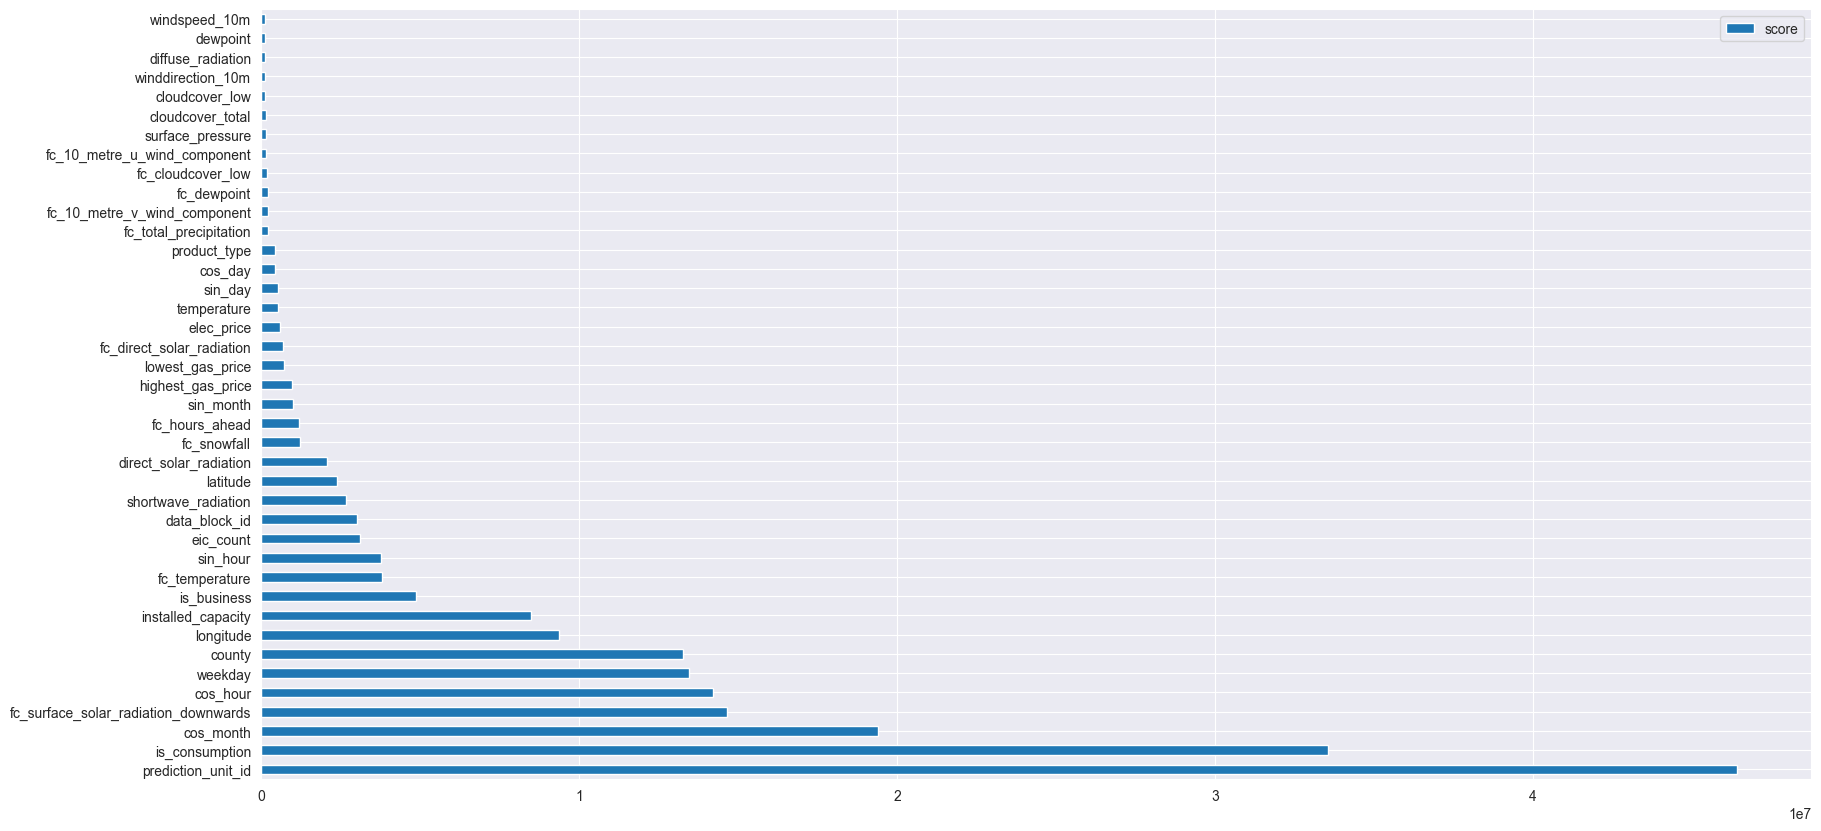

In [63]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth=13).fit(X_train, Y_train)
reg_dic['XGB'] = xgb_reg

feature_important = xgb_reg.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

gain = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
gain.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))

##### ARDRegressor

In [64]:
ard_reg = linear_model.ARDRegression().fit(X_train, Y_train)
reg_dic['ARD'] = ard_reg

##### OrthogonalMatchingPursuit

In [65]:
omp_reg = linear_model.OrthogonalMatchingPursuit().fit(X_train, Y_train)
reg_dic['OrthogonalMP'] = omp_reg

##### RandomForestRegressor

In [66]:
#rf_reg = RandomForestRegressor(max_depth=1, random_state=0).fit(X_train, Y_train)
#reg_dic['RandomForest'] = rf_reg

##### Bayesian Ridge

In [67]:
bRidge_reg = linear_model.BayesianRidge().fit(X_train, Y_train)
reg_dic['BayesianRidge'] = bRidge_reg

## Metrics and Evaluation

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

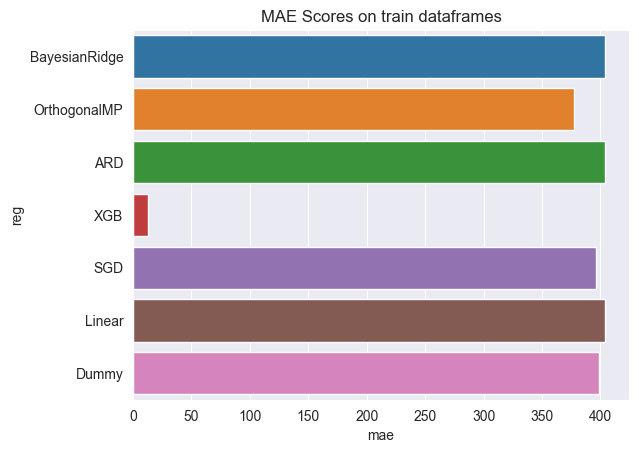

,reg,mae
0,BayesianRidge,404.246682
1,OrthogonalMP,377.474778
2,ARD,404.246028
3,XGB,12.693241
4,SGD,396.090432
5,Linear,404.276783
6,Dummy,399.048996


In [69]:
df = pd.DataFrame(columns=['reg', 'mae'])
for reg in reg_dic:
    df.loc[-1] = [reg, mean_absolute_error(Y_train, reg_dic[reg].predict(X_train))]
    df.index = df.index + 1
    df = df.sort_index()

ax = sns.barplot(data=df, x="mae", y="reg", hue="reg").set(title='MAE Scores on train dataframes')
plt.show()
df

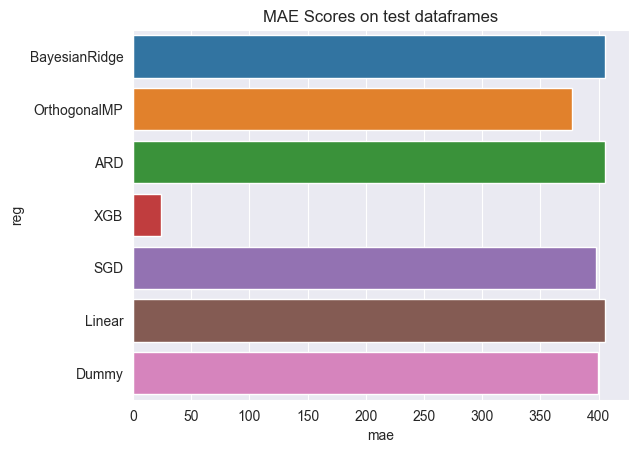

,reg,mae
0,BayesianRidge,405.795015
1,OrthogonalMP,377.232034
2,ARD,405.794340
3,XGB,23.810181
4,SGD,397.907623
5,Linear,405.845883
6,Dummy,399.711207


In [70]:
df = pd.DataFrame(columns=['reg', 'mae'])
for reg in reg_dic:
    df.loc[-1] = [reg, mean_absolute_error(Y_test, reg_dic[reg].predict(X_test))]
    df.index = df.index + 1
    df = df.sort_index()

ax = sns.barplot(data=df, x="mae", y="reg", hue="reg").set(title='MAE Scores on test dataframes')
plt.show()
df

## Hyperparametrization

In [80]:
##Test en enlevant les colonnes les moins utiles
train_filtered = df_train.drop(columns=list(gain[gain['score'] < 200000].index))

print(train_filtered.shape)

X_filtered = train_filtered.drop('target', axis=1)
Y_filtered = train_filtered['target']

X_train_f, X_test_f, Y_train_f, Y_test_f = sklearn.model_selection.train_test_split(X_filtered, Y_filtered, test_size=0.02, random_state=42)

xgb_reg = xgb.XGBRegressor(max_depth=13).fit(X_train_f, Y_train_f)
mean_absolute_error(Y_test_f, xgb_reg.predict(X_test_f))

(1711700, 33)


23.34583167552409

In [72]:
def hyperparameter_search(model, params):
    print('Params :', params)
    grid_search = sklearn.model_selection.GridSearchCV(model, params, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, Y_train)

    print('Meilleurs params :', grid_search.best_params_)
    best_params = {}
    for param in params:
        best_params[param] = grid_search.best_params_[param]
    return best_params

#### XGB

In [73]:
# xgb_params = {'n_estimators': [], 'max_depth': [], 'n_jobs': [-1]}
# for i in range(2, 20, 2):
#     xgb_params['n_estimators'].append(i * 10)
#     xgb_params['max_depth'].append(i)
# 
# #On crée un espace xgb
# best_xgb_params = hyperparameter_search(xgb.XGBRegressor(), xgb_params)
# 
# xgb_reg = xgb.XGBRegressor(n_estimators=best_xgb_params['n_estimators'], max_depth=best_xgb_params['max_depth'],
#                            n_jobs=-1).fit(X_train, Y_train)
# reg_dic['XGB'] = xgb_reg

In [75]:
import numpy as np
from hyperopt import STATUS_OK, fmin, hp, tpe

SEED = 314159265


def score(params):
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(X_train_f, label=Y_train_f)
    dvalid = xgb.DMatrix(X_test_f, label=Y_test_f)
    watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    gbm_model = xgb.train(params, dtrain, num_round,
                          evals=watchlist,
                          verbose_eval=True)
    predictions = gbm_model.predict(dvalid)
    score = mean_absolute_error(Y_test, predictions)
    # TODO: Add the importance for the selected features
    # The score function should return the loss (1-score)
    # since the optimize function looks for the minimum
    return {'loss': score, 'status': STATUS_OK}


def optimize(random_state=4242):
    space = {
        'n_estimators': hp.quniform('n_estimators', 20, 200, 1),
        'max_depth': hp.choice('max_depth', np.arange(8, 14, dtype=int)),
        'eval_metric': 'mae',
        'nthread': 4,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'seed': random_state
    }
    return fmin(score, space, algo=tpe.suggest, max_evals=150)


best_hyperparams = optimize()
print("The best hyperparameters are: ", "\n")
print(best_hyperparams)

[0]	eval-mae:288.69957	train-mae:287.71036             
[1]	eval-mae:212.67361	train-mae:211.63072             
[2]	eval-mae:159.88194	train-mae:159.08947             
[3]	eval-mae:125.00867	train-mae:123.80181             
[4]	eval-mae:101.11148	train-mae:99.87360              
[5]	eval-mae:84.65438	train-mae:83.40541               
[6]	eval-mae:73.03555	train-mae:71.79779               
[7]	eval-mae:64.78201	train-mae:63.60841               
[8]	eval-mae:59.27125	train-mae:57.93858               
[9]	eval-mae:54.78999	train-mae:53.47208               
[10]	eval-mae:51.87216	train-mae:50.52417              
[11]	eval-mae:49.79477	train-mae:48.49677              
[12]	eval-mae:48.63657	train-mae:47.31069              
[13]	eval-mae:47.35458	train-mae:46.02914              
[14]	eval-mae:46.50843	train-mae:45.21000              
[15]	eval-mae:45.66686	train-mae:44.37162              
[16]	eval-mae:45.15557	train-mae:43.89161              
[17]	eval-mae:44.92401	train-mae:43.60681       

KeyboardInterrupt: 